<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla.history(period='max')

# Display the first five rows of the DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame after resetting the index
print("\nFirst five rows of tesla_data (after resetting index):")
print(tesla_data.head())



First five rows of tesla_data (after resetting index):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [14]:
import requests
# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    # Save the text of the response as a variable named html_data
    html_data = response.text
else:
    print(f"Failed to fetch {url}")
    html_data = None

Parse the html data using `beautiful_soup`.


In [18]:
from bs4 import BeautifulSoup
if html_data is not None:
    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use pandas read_html function to extract the table directly into a DataFrame
tables = pd.read_html(url)
# Assuming there is only one table on the page, select the first table
if len(tables) > 0:
    tesla_revenue = tables[0]

    # Rename the columns to Date and Revenue
    tesla_revenue.columns = ['Date', 'Revenue']

    # Print the DataFrame
    print(tesla_revenue)
else:
    print("No tables found on the webpage.")


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
if len(tables) > 0:
    tesla_revenue = tables[0]

    # Rename the columns to Date and Revenue
    tesla_revenue.columns = ['Date', 'Revenue']

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [28]:
import yfinance as yf
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [35]:
import yfinance as yf
# Extract stock information with period set to "max"
gme_data = GameStop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [36]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)
# Display the first five rows of the DataFrame using the head function
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [37]:
print(gme_data.tail())

                          Date       Open       High        Low  Close  \
5391 2023-07-17 00:00:00-04:00  22.879999  23.309999  22.700001  22.82   
5392 2023-07-18 00:00:00-04:00  22.719999  23.799999  22.680000  23.08   
5393 2023-07-19 00:00:00-04:00  23.420000  23.580000  22.959999  23.17   
5394 2023-07-20 00:00:00-04:00  23.010000  23.219999  22.660000  22.91   
5395 2023-07-21 00:00:00-04:00  23.049999  23.219999  22.160000  22.18   

       Volume  Dividends  Stock Splits  
5391  2026000        0.0           0.0  
5392  2345100        0.0           0.0  
5393  2250100        0.0           0.0  
5394  2256700        0.0           0.0  
5395  3134100        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [41]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP GET request and get the response
response = requests.get(url)

Parse the html data using `beautiful_soup`.


In [42]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP GET request and get the response
response = requests.get(url)

if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_data, 'html.parser')

Webpage downloaded successfully.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [47]:
import pandas as pd

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use pandas read_html function to extract the table directly into a DataFrame
tables = pd.read_html(url)

# Assuming there is only one table on the page, select the first table
if len(tables) > 0:
    gme_revenue = tables[0]

    # Rename the columns to Date and Revenue
    gme_revenue.columns = ['Date', 'Revenue']
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

    # Display the first five rows of the DataFrame using the head function
    print(gme_revenue.head())
else:
    print("No tables found on the webpage.")


   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [48]:
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


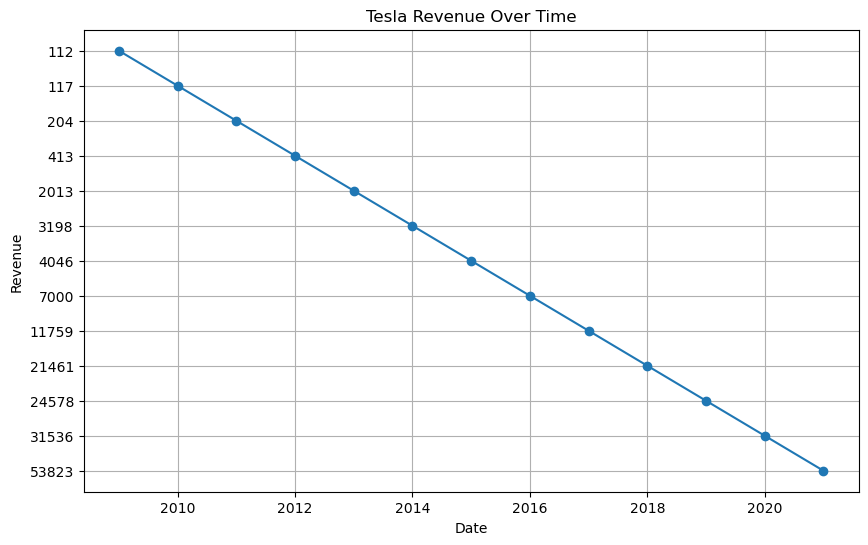

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(dataframe, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe[x_column], dataframe[y_column], marker='o', linestyle='-')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Assuming the tesla_revenue DataFrame contains the Tesla stock data
make_graph(tesla_revenue, 'Date', 'Revenue', 'Tesla Revenue Over Time')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


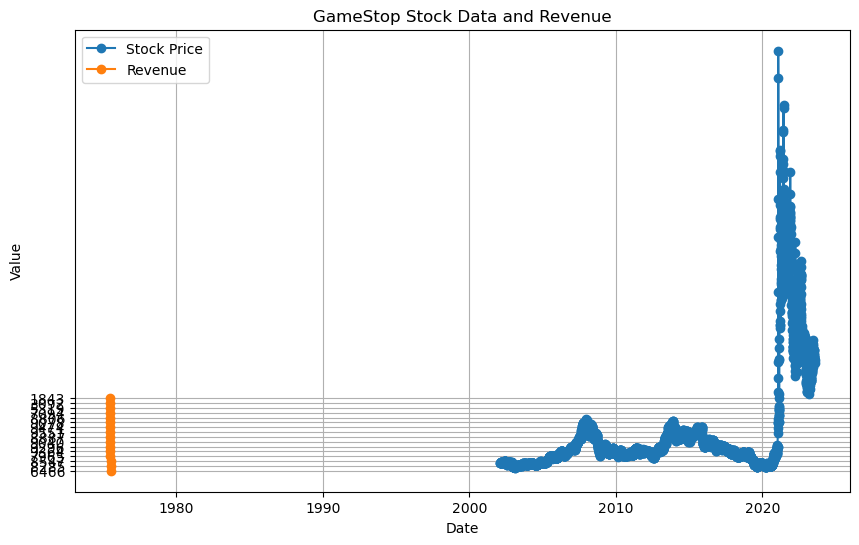

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(dataframe1, dataframe2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe1['Date'], dataframe1['Close'], label='Stock Price', marker='o', linestyle='-')
    plt.plot(dataframe2['Date'], dataframe2['Revenue'], label='Revenue', marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have the gme_data and gme_revenue DataFrames
make_graph(gme_data, gme_revenue, 'GameStop Stock Data and Revenue')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
